In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.head(5)
df.columns
df.dtypes

#dropping columns permnanetly, leaving only the one i'm using
drop_cols = ['School Level', 'Total Tested', 'Regents Exam','Percent Scoring CR', 'Number Scoring CR','Percent Scoring 80 or Above', 'Percent Scoring 65 or Above', 'Percent Scoring Below 65', 'Number Scoring 65 or Above','Mean Score', 'Number Scoring 80 or Above']
df.drop(drop_cols, inplace= True, axis=1)
df.head(5)

#changes all the 's' to NAN
df['Number Scoring Below 65'] = pd.to_numeric(df['Number Scoring Below 65'], errors='coerce')
df.head()

#replaces all the NAN with 0 -- value i chose
df['Number Scoring Below 65'].fillna('0', inplace=True)
df.head()

#change data type from object to int -- can use it to plot later
df['Number Scoring Below 65'] = df['Number Scoring Below 65'].astype(int)
df.dtypes

School DBN                 object
School Name                object
Year                        int64
Number Scoring Below 65     int64
dtype: object

In [7]:
df.head(5)

,School DBN,School Name,Year,Number Scoring Below 65
0,01M034,P.S. 034 Franklin D. Roosevelt,2017,0
1,01M034,P.S. 034 Franklin D. Roosevelt,2015,1
2,01M034,P.S. 034 Franklin D. Roosevelt,2016,1
3,01M140,P.S. 140 Nathan Straus,2016,0
4,01M140,P.S. 140 Nathan Straus,2017,0


In [2]:
# (Manhattan district 1) Stats  Obtaining only score under 65 for district 01 Manhattan, grouping it by year
df4=df[df["School DBN"].str.contains('01M')].groupby(df["Year"])["Number Scoring Below 65"].sum()
df4

Year
2015    6078
2016    5671
2017    4749
Name: Number Scoring Below 65, dtype: int64

In [3]:
# (NATHAN) stats Obtaining only score under 65 for a specific school in district 01 Manhattan, grouping it by year
df3=df[df["School DBN"].str.contains('01M140')].groupby(df["Year"])["Number Scoring Below 65"].sum()
df3

Year
2015     3
2016     2
2017    17
Name: Number Scoring Below 65, dtype: int64

In [4]:
# (Franklin D. Roosevelt) Stats  Obtaining only score under 65 for a specific school in district 01 Manhattan, grouping it by year
df4=df[df["School DBN"].str.contains('01M034')].groupby(df["Year"])["Number Scoring Below 65"].sum()
df4

Year
2015    4
2016    2
2017    0
Name: Number Scoring Below 65, dtype: int64

In [5]:
# (Shuang Wen) stats  Obtaining only score under 65 for a specific school in district 01 Manhattan, grouping it by year
df5=df[df["School DBN"].str.contains('01M184')].groupby(df["Year"])["Number Scoring Below 65"].sum()
df5

Year
2015     3
2016    27
2017     4
Name: Number Scoring Below 65, dtype: int64

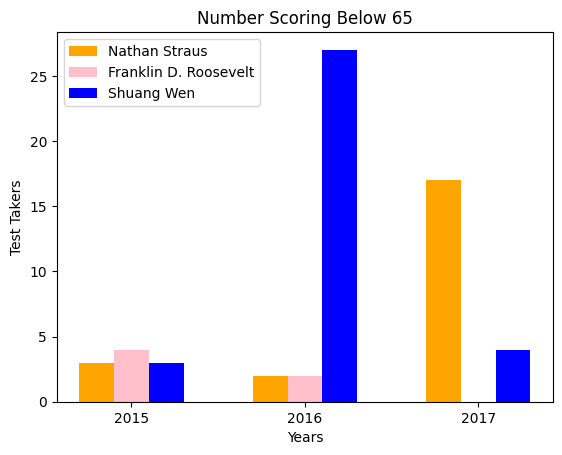

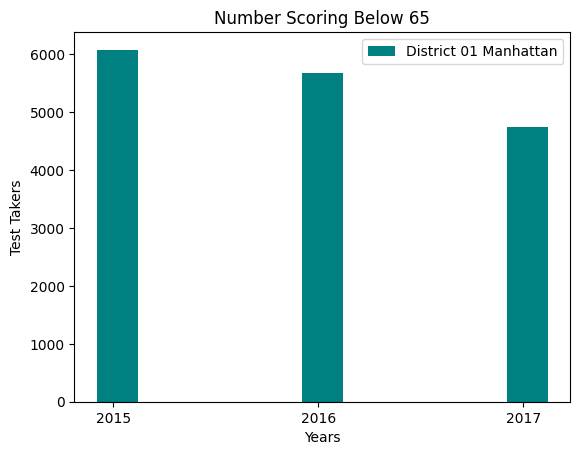

In [6]:
#Chart 1: combining the 3 schools into 1 comparison chart
import numpy as np
import matplotlib.pyplot as plt

X = np.array(['2015','2016','2017'])
Nathan = [3,2,17] # these numbers obtain from df 3,4,5
Franklin =[4,2,0]
Shuang =[3,27,4]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.20, Nathan, 0.2, color='orange', label='Nathan Straus')
plt.bar(X_axis, Franklin, 0.2, color='pink', label='Franklin D. Roosevelt')
plt.bar(X_axis + 0.20, Shuang, 0.2, color='blue', label='Shuang Wen')

plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Test Takers")
plt.title("Number Scoring Below 65")
plt.legend()
plt.show()

#Chart 2: Overall Manhattan district doesn't fit in chart1, therefore created it seperately to show it as a reference for comparison to chart1
X = np.array (['2015','2016','2017'])
Manhattan = [6078, 5671, 4749] # these numbers obtain from df2

X_axis = np.arange(len(X))
plt.bar(X_axis + 0.02, Manhattan, 0.2, color='teal', label='District 01 Manhattan')

plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Test Takers")
plt.title("Number Scoring Below 65")
plt.legend()
plt.show()

Overall, compare to the entire district 1 in Manhattan, the number of test takers scoring under 65, drops every year. The only school that follows this trend is Franklin. While, Nathan shows dramatically increase in 2017, and Shuang in 2016.